Autencoder Implementation using Keras


Step 1: Importing the Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from keras import backend as K
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
import tensorflow as tf

Step 2: Loading the Data (Utility function)

Here too, we're using MNIST data. Run the code below to load the data and clean it (convert, scale and reshape).

In [2]:
def load_data():
	input_image = Input(shape =(28, 28, 1))
	(X_train, _), (X_test, _) = mnist.load_data()
 
	X_train = X_train.astype('float32') / 255.
	X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
	X_test = X_test.astype('float32') / 255.
	X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))
	
	return X_train, X_test, input_image

Step 3: Building the Network

In the function build_network, we stack up layers to construct the encoder and decoder separately. You will need to add layers to the encoder as described below:
3 convolutional layers (activation function would be ReLU) and 3 max pooling layers to compliment it. 

The decoder takes the output of the last max pooling layer of the encoder as the input. It too has 3 convolutional layers (activation function would be ReLU) and 3 upsampling layers. 

In [3]:
def build_network(input_image):
  encoder = Conv2D(32, 3, (1, 1), activation='relu', padding="same")(input_image)
  encoder = MaxPooling2D((2, 2), None, padding="same")(encoder)

  encoder = Conv2D(16, 3, (1, 1), activation='relu', padding="same")(encoder)
  encoder = MaxPooling2D((2, 2), None, padding="same")(encoder)

  encoder = Conv2D(8, 3, (1, 1), activation='relu', padding="same")(encoder)
  encoder = MaxPooling2D((2, 2), None, padding="same")(encoder)

  decoder = Conv2D(8, 3, (1, 1), activation='relu', padding="same")(encoder)
  decoder = UpSampling2D((2, 2))(decoder)

  decoder = Conv2D(16, 3, (1, 1), activation='relu', padding="same")(decoder)
  decoder = UpSampling2D((2, 2))(decoder)

  decoder = Conv2D(32, 3, (1, 1), activation='relu', padding="valid")(decoder)
  decoder = UpSampling2D((2, 2))(decoder)

  decoder_layer = Conv2D(1, 3, activation='sigmoid', padding="same")(decoder)

  return decoder_layer

Step 4: Building and Training the Network

Modify the epochs and batch size to best work with the model and data. 

In [4]:
def build_auto_encoder_model(X_train, X_test, input_image, decoded_layer):
	
	#Define the autoencoder parameters
	autoencoder = Model(input_image, decoded_layer)
	autoencoder.compile(optimizer ='adadelta', loss ='binary_crossentropy')

	autoencoder.fit(X_train, X_train,
				epochs = 1000,
				batch_size = 256,
				shuffle = True,
				validation_data =(X_test, X_test),
				callbacks =[TensorBoard(log_dir ='/tmp / autoencoder')])
	
	return autoencoder

Step 5: Visualisation


In [5]:
def visualize(model, X_test):
	
	reconstructed_images = model.predict(X_test)
	
	plt.figure(figsize =(20, 4))
	for i in range(1, 11):
		rand_num = randint(0, 10001)
		ax = plt.subplot(2, 10, i)
		plt.imshow(X_test[rand_num].reshape(28, 28))
		plt.gray()
		ax.get_xaxis().set_visible(False)
		ax.get_yaxis().set_visible(False)

		#Displaying reconstructed image
		ax = plt.subplot(2, 10, i + 10)
		plt.imshow(reconstructed_images[rand_num].reshape(28, 28))
		plt.gray()
		ax.get_xaxis().set_visible(False)
		ax.get_yaxis().set_visible(False)

	plt.show()

Final Run

Write code to load data, build the network and visualise what's going on. These will be direct function calls!

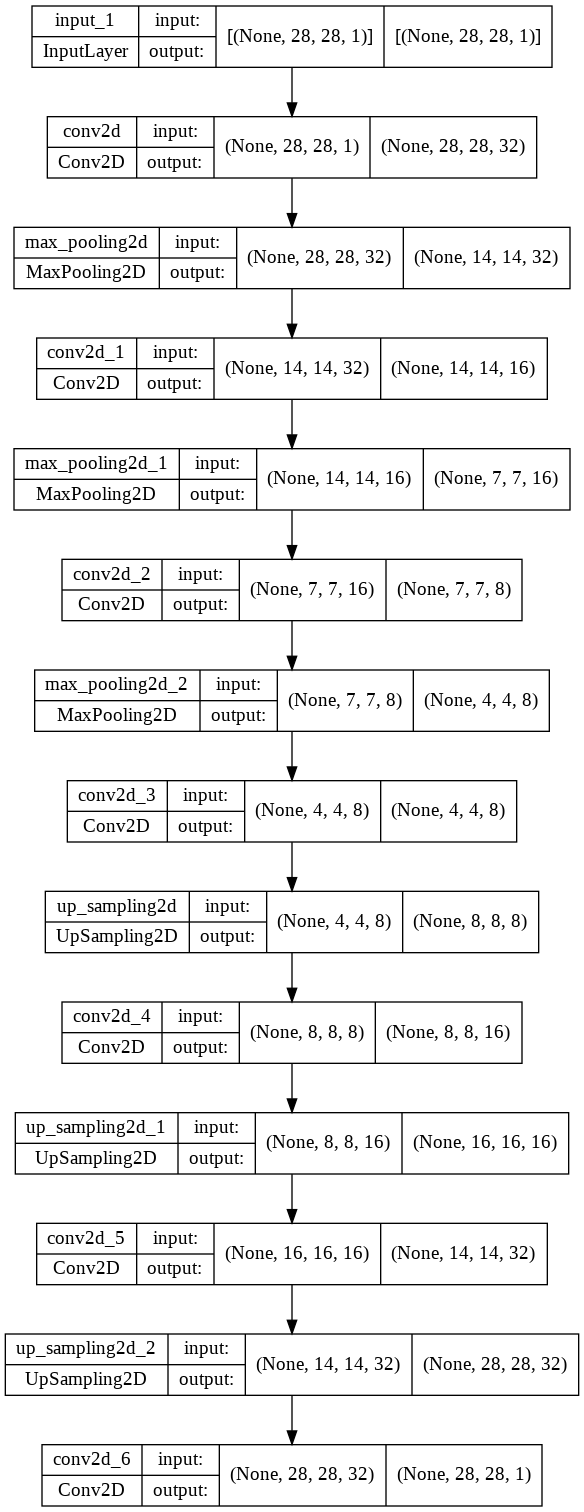

In [6]:
X_train, X_test, input_img = load_data()
decoder = build_network(input_img)
autoencoder = Model(input_img, decoder)
autoencoder.compile(optimizer ='adadelta', loss ='binary_crossentropy')
tf.keras.utils.plot_model(autoencoder, show_shapes=True)

In [7]:
decoder = build_network(input_img)
model = build_auto_encoder_model(X_train, X_test, input_img, decoder)

Epoch 1/1000
235/235 [==============================] - 6s 15ms/step - loss: 0.6903 - val_loss: 0.6893
Epoch 2/1000
235/235 [==============================] - 3s 12ms/step - loss: 0.6880 - val_loss: 0.6867
Epoch 3/1000
235/235 [==============================] - 3s 12ms/step - loss: 0.6849 - val_loss: 0.6831
Epoch 4/1000
235/235 [==============================] - 3s 11ms/step - loss: 0.6805 - val_loss: 0.6776
Epoch 5/1000
235/235 [==============================] - 2s 9ms/step - loss: 0.6735 - val_loss: 0.6688
Epoch 6/1000
235/235 [==============================] - 2s 9ms/step - loss: 0.6616 - val_loss: 0.6529
Epoch 7/1000
235/235 [==============================] - 2s 9ms/step - loss: 0.6387 - val_loss: 0.6213
Epoch 8/1000
235/235 [==============================] - 2s 9ms/step - loss: 0.5931 - val_loss: 0.5615
Epoch 9/1000
235/235 [==============================] - 2s 9ms/step - loss: 0.5298 - val_loss: 0.5103
Epoch 10/1000
235/235 [==============================] - 2s 9ms/step - loss: 0

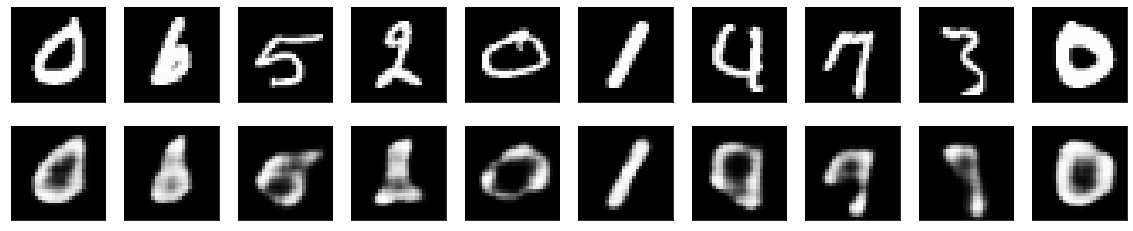

In [8]:
visualize(model, X_test)